# Implement Knapsack Algorithm

## Recursive

In [1]:
def knapsack_rec(capacity, quantity, weights, profits):
    if capacity == 0 or quantity == 0:
        return 0

    if weights[quantity-1] > capacity:
        return knapsack_rec(capacity, quantity-1, weights, profits)

    return max(
        profits[quantity-1] + knapsack_rec(capacity-weights[quantity-1], quantity, weights, profits), 
        knapsack_rec(capacity, quantity-1, weights, profits)
    )

## Bottom-Up (2D)

In [2]:
def knapsack_budp_2(capacity, quantity, weights, profits):
    results = [[0 for _ in range(capacity + 1)] for _ in range(quantity)]
    for c in range(capacity + 1):
        results[0][c] = (c // weights[0]) * profits[0]

    for i in range(1, quantity):
        for c in range(1, capacity + 1):
            if (weights[i] <= c):
                results[i][c] = max(results[i - 1][c], profits[i] + results[i][c - weights[i]])
            else:
                results[i][c] = results[i - 1][c]

    return results[-1][-1], results

## Bottom-Up (1D)

In [3]:
def knapsack_budp_1(capacity, quantity, weights, profits): 
    results = [0 for _ in range(capacity + 1)]
    
    for i in range(1, capacity + 1):
        for j in range(quantity):
            if weights[j] <= i:
                results[i] = max(results[i], results[i - weights[j]] + profits[j])
  
    return results[-1], results

# Compare Sub-Problem Graphs

## Scenario 1
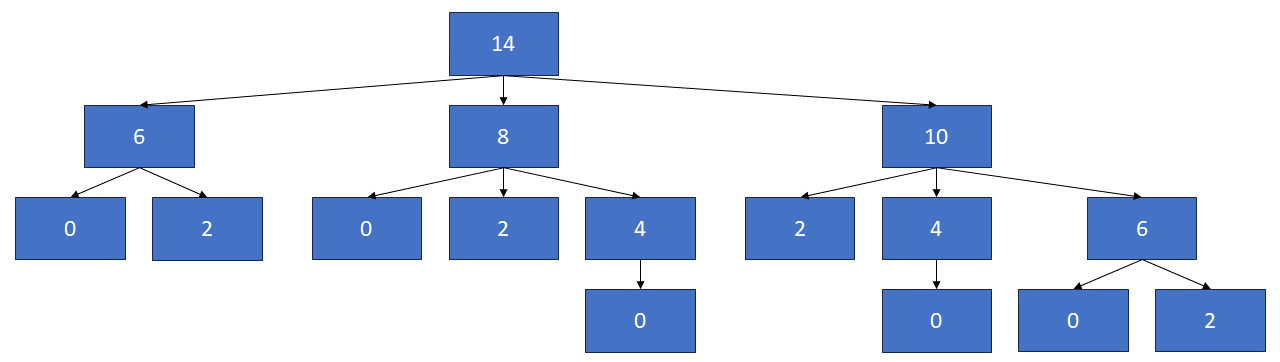
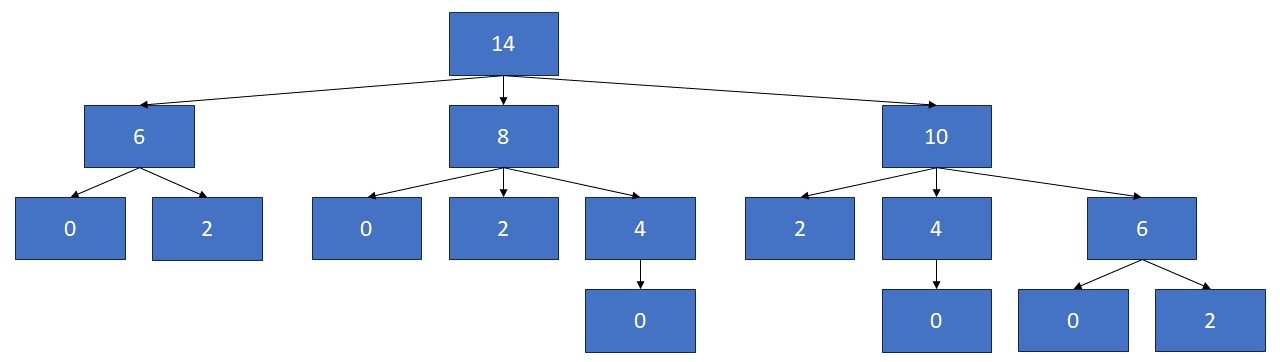

In [4]:
# weights = [1, 2, 3, 4, 5]
# profits = [7, 15, 23, 30, 33]

weights = [4, 6, 8]
profits = [7, 6, 9]
capacity = 14
quantity = len(weights)
results_1 = {}

In [5]:
results_1['REC'] = knapsack_rec(capacity, quantity, weights, profits)
results_1['DP2'] = knapsack_budp_2(capacity, quantity, weights, profits)
results_1['DP1'] = knapsack_budp_1(capacity, quantity, weights, profits)
results_1

{'REC': 21,
 'DP2': (21,
  [[0, 0, 0, 0, 7, 7, 7, 7, 14, 14, 14, 14, 21, 21, 21],
   [0, 0, 0, 0, 7, 7, 7, 7, 14, 14, 14, 14, 21, 21, 21],
   [0, 0, 0, 0, 7, 7, 7, 7, 14, 14, 14, 14, 21, 21, 21]]),
 'DP1': (21, [0, 0, 0, 0, 7, 7, 7, 7, 14, 14, 14, 14, 21, 21, 21])}

## Scenario 2
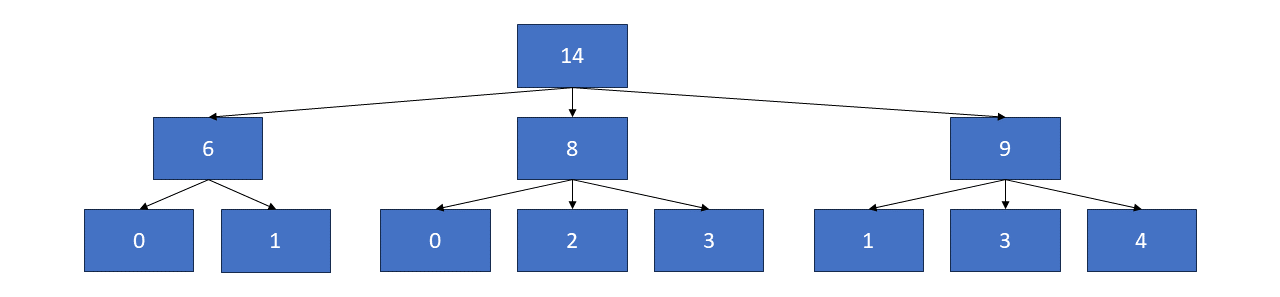

In [6]:
weights = [5, 6, 8]
profits = [7, 6, 9]
capacity = 14
objects = len(weights)
results_2 = {}

In [7]:
results_2['REC'] = knapsack_rec(capacity, quantity, weights, profits)
results_2['DP2'] = knapsack_budp_2(capacity, quantity, weights, profits)
results_2['DP1'] = knapsack_budp_1(capacity, quantity, weights, profits)
results_2

{'REC': 16,
 'DP2': (16,
  [[0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 14, 14, 14, 14, 14],
   [0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 14, 14, 14, 14, 14],
   [0, 0, 0, 0, 0, 7, 7, 7, 9, 9, 14, 14, 14, 16, 16]]),
 'DP1': (16, [0, 0, 0, 0, 0, 7, 7, 7, 9, 9, 14, 14, 14, 16, 16])}